In [1]:
%matplotlib notebook

# Dependencies

import numpy as np

from matplotlib import pyplot as plt

# Calculating saturating colony size

### Q: Given the amount of glucose (10mM in total of 10mL of agar media volume), what is the maximum radius a colony can reach?

Let's assume the colony can either have a conic shape with volume $\pi R^2 h/3$ with $R$ is the radius of the colony, $h$ is the height from the top to the bottom, or in a cylindrical shape with volume $\pi R^2 h$. Assuming the biomass yield for Glucose is $Y=0.2 OD/mM$, for 100 colonies on a plate, we have a total of $1\mu mol$ of Glucose, which corresponds to $2\times10^8 cells$. Assuming a cell can occupy $1 \mu m^3$ of volume, we can calculate the maximum radius $R$ for different height $h$ and shape.

In [13]:
yield_ODpermM = 0.2    # glucose = 0.2, glycerol = ?
cellsperODmL = 1e9
agar_volume_mL = 16
carbon_conc_mM = 10    # glucose = 10, glycerol = 20
CFU = 10

mols_of_carbon_umol = carbon_conc_mM*agar_volume_mL
number_of_cells_perumol = yield_ODpermM*cellsperODmL # saturated number of cells per plate
number_of_cells_percolony = number_of_cells_perumol/CFU*mols_of_carbon_umol # average saturated number of cells per colony
print(number_of_cells_percolony)

# number_of_cells = 2e8 #cells
volume_per_cell = 1 #um^3/cell
colony_volume = number_of_cells_percolony*volume_per_cell
h = np.arange(10,500)
R_cyl = np.sqrt(colony_volume/np.pi/h)
R_con = np.sqrt(colony_volume/np.pi/h*3)

3200000000.0


<IPython.core.display.Javascript object>


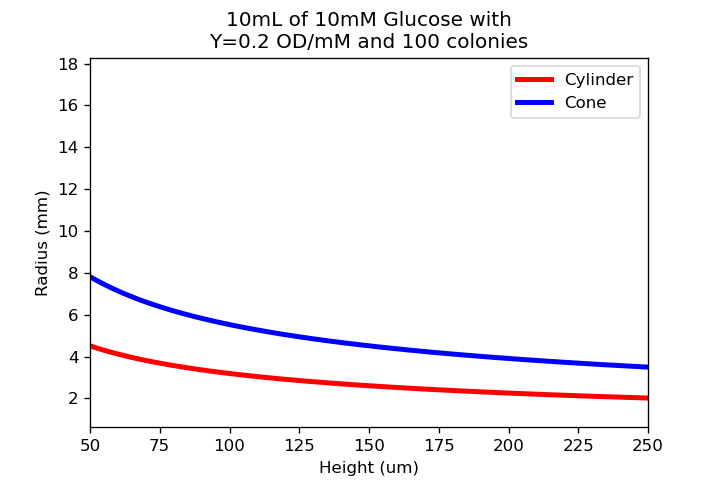

In [14]:
fig,ax = plt.subplots(figsize=(6,4), dpi=120)
ax.plot(h,R_cyl/1e3, 'r-', linewidth=3, label="Cylinder")
ax.plot(h,R_con/1e3, 'b-', linewidth=3, label="Cone")
# Add Glucose
# ax.plot([0,1000], [radius_glu[-1]/1e3, radius_glu[-1]/1e3], 'k--', label="Measured")

ax.set_xlim(50,250)
ax.set_xlabel("Height (um)")
# ax.set_ylim(0,2)
ax.set_ylabel("Radius (mm)")

ax.set_title("10mL of 10mM Glucose with\nY=0.2 OD/mM and 100 colonies")
ax.legend()